In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#from bokeh.io import show, output_file
#from bokeh.plotting import figure
from sklearn.preprocessing import StandardScaler
import os

In [63]:
df = pd.read_csv("merge_data_before_normalization.tsv", sep="\t", header=0)#, index_col=0)

In [67]:
df.head()

,label,dataset,GO:0000001,GO:0000002,GO:0000011,GO:0000015,GO:0000030,GO:0000034,GO:0000041,GO:0000045,...,GO:1902208,GO:1902209,GO:1902751,GO:1905515,GO:1990426,GO:2000028,GO:2000146,GO:2000401,GO:2000479,GO:2001070
0,EB271-02-01,Enigma,2.0,10.0,9.0,28.0,164.0,130.0,786.0,6.0,...,0.0,0.0,1.0,0.0,0.0,12.0,22.0,0.0,9.0,3.0
1,EB271-02-02,Enigma,5.0,11.0,10.0,32.0,86.0,86.0,755.0,22.0,...,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,5.0,0.0
2,EB271-02-03,Enigma,5.0,21.0,10.0,18.0,56.0,45.0,419.0,17.0,...,0.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0,6.0,0.0
3,EB271-03-01,Enigma,3.0,27.0,9.0,51.0,132.0,131.0,902.0,2.0,...,0.0,0.0,6.0,0.0,0.0,0.0,23.0,0.0,5.0,2.0
4,EB271-03-02,Enigma,6.0,10.0,9.0,46.0,137.0,99.0,879.0,21.0,...,0.0,0.0,0.0,1.0,1.0,0.0,31.0,1.0,7.0,2.0


In [64]:
df.label[0:20]

0                                           EB271-02-01
1                                           EB271-02-02
2                                           EB271-02-03
3                                           EB271-03-01
4                                           EB271-03-02
5                                           EB271-03-03
6                                           EB271-04-01
7                                           EB271-04-02
8                                           EB271-04-03
9                                           EB271-04-04
10                                          EB271-05-01
11                                          EB271-05-02
12                                          EB271-05-03
13                                          EB271-05-04
14           root:Environmental:Aquatic:Marine:Brackish
15                         root:Engineered:Biogas plant
16                           root:Engineered:Bioreactor
17                         root:Host-associated:

In [65]:
df_new = pd.read_csv("../ENIGMA_InterPro/InterPro_GO_summaries/AA_S_11_Prodigal_proteins_InterProScan.tsv.out", sep=",", header=None)#, index_col=0)

In [66]:
df_new

,0,1,2,3
0,GO:0055085,transmembrane transport,biological_process,1897
1,GO:0006355,"regulation of transcription, DNA-templated",biological_process,1484
2,GO:0006412,translation,biological_process,1130
3,GO:0006508,proteolysis,biological_process,729
4,GO:0000160,phosphorelay signal transduction system,biological_process,673
...,...,...,...,...
1605,GO:0070273,phosphatidylinositol-4-phosphate binding,molecular_function,1
1606,GO:0070290,N-acylphosphatidylethanolamine-specific phosph...,molecular_function,1
1607,GO:0097266,"phenylacetyl-CoA 1,2-epoxidase activity",molecular_function,1
1608,GO:1904680,peptide transmembrane transporter activity,molecular_function,1


In [89]:
x = df.columns.values[2:]
y = df_new.loc[:,0].values
lenx = len(x)
leny = len(y)
if(lenx < leny):
    indices = np.where(np.in1d(x, y))[0]
    indices2 = np.where(np.in1d(y, x))[0]
else:
    indices = np.where(np.in1d(y, x))[0]
    indices2 = np.where(np.in1d(x, y))[0]
indices

array([   0,    1,    2, ..., 1599, 1602, 1609])

In [79]:
indices[0:10]

array([ 3,  4,  5,  8, 14, 15, 16, 17, 22, 24])

In [90]:
if(lenx < leny):
    x_data = df.iloc[10].values[2:][indices]
    y_data = df_new.loc[:,3].values[indices2]
else:
    x_data = df.iloc[10].values[2:][indices2]
    y_data = df_new.loc[:,3].values[indices]
print(len(x_data))
print(len(y_data))

1362
1362


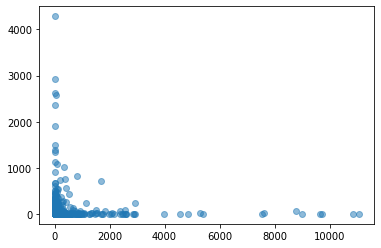

In [92]:
plt.scatter(x_data, y_data, alpha=0.5)
plt.show()